# Ciencia de datos (CC408) - Primavera 2024

## Trabajo Práctico 3

### Parte I: Limpieza de la base

In [ ]:
#!pip install openpyxl

In [1]:
# Importamos las librerías a usar

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


#### Lectura del documento

In [106]:
## 0. LECTURA DEL DOCUMENTO
df2024 = pd.read_excel('C:/Users/SAMSUNG/Documents/GitHub/CC408-T1-5/TP 3/usu_individual_T124.xlsx')
df2004 = pd.read_stata('C:/Users/SAMSUNG/Documents/GitHub/CC408-T1-5/TP 3/Individual_t104.dta')

#Dirección de Maggie: "C:/Users/magda/OneDrive/Documents/GitHub/CC408-T1-5/TP 3"
#Dirección de Peter: "C:/Users/SAMSUNG/Documents/GitHub/CC408-T1-5/TP 3/usu_individual_T124.xlsx"

#### Filtrado de bases para tener solo Buenos Aires

In [115]:
df_2024_GB = df2024[(df2024['AGLOMERADO'] == 33) | (df2024['AGLOMERADO'] == 32)]
df_2004_GB = df2004[(df2004['aglomerado'] == 'Ciudad de Buenos Aires') | (df2004 ['aglomerado'] == 'Partidos del GBA' )]

df_2004_GB.columns = df_2004_GB.columns.str.upper()
df_2024_GB['IPCF'] =df_2024_GB['IPCF'].astype(int)
#df_2024_GB['AGLOMERADO'].unique()
#df_2004_GB['aglomerado'].unique()

C:\Users\SAMSUNG\AppData\Local\Temp\ipykernel_3396\3212184527.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2024_GB['IPCF'] =df_2024_GB['IPCF'].astype(int)


#### Preparación de la base de 2004
Se definen diccionarios de cambio para pasarlo a los mismos valores que tiene la base de 2024, se hacen solo los diccionarios de las variables que se van a usar después para la matriz de correlación. 
- Se hacen diccionarios
- Se vuelven a definir los valores a partir de los diccionarios
- Se chequea si hay valores extraños / no validos
- Se eliminan los ingresos y edades negativas y edades demasiado altas
- El resto de valores invalidos (CAT_INAC) se eliminan después cuando se verifique la base de 2024

In [116]:
#diccionarios de cambio
# El diccionario de la base de datos está un poco mal hecho, con diferencia a como se guardan los datos. que malditos
h04 = {
    "Varón": 1,
    "Mujer": 2
}

#Esto no aparece
h06 = {
    'Menos de 1 año': 0,
    '98 y más años': 98
}

#esto aparece con signos de pregunta
h07 = {
    "Unido": 1,
    "Casado": 2,
    "Separado o divorciado": 3,
    "Viudo": 4,
    "Soltero": 5
}

#Esto con mayusculas incosistentes
h08 =    {
    'Obra social (incluye PAMI)': 1,
    'Mutual/Prepaga/Servicio de emergencia': 2,
    'Planes y seguros públicos': 3,
    'No paga ni le descuentan': 4,
    'Ns./Nr.': 9,
    'Obra social y mutual/prepaga/servicio de emergencia': 12,
    'Obra social y planes y seguros públicos': 13,
    'Mutual/prepaga/servicio de emergencia/planes y seguros públi': 23,
    'Obra social, mutual/prepaga/servicio de emergencia y planes': 123
}

# 'Secundario incompleto' y en los datos aparece como 'Secuandaria incompleta', así con todo
nivel_ed= {
    'Primaria Incompleta (incluye educación especial)': 1,
    'Primaria Completa': 2,
    'Secundaria Incompleta': 3,
    'Secundaria Completa': 4,
    'Superior Universitaria Incompleta': 5,
    'Superior Universitaria Completa': 6,
    'Sin instrucción': 7,
    'Ns/Nr': 9
}

estado = {
    'Entrevista individual no realizada (no respuesta al cuestion': 0,
    'Ocupado': 1,
    'Desocupado': 2,
    'Inactivo': 3,
    'Menor de 10 años': 4
}

cat_inac = {
    'Jubilado/pensionado': 1,
    'Rentista': 2,
    'Estudiante': 3,
    'Ama de casa': 4,
    'Menor de 6 años': 5,
    'Discapacitado': 6,
    'Otros': 7
}

In [117]:
df_2004_GB.loc[:,'CAT_INAC'] = df_2004_GB ['CAT_INAC'].replace(cat_inac).astype(int) # Tiene 0 a eliminar
df_2004_GB.loc[:,'CH04'] = df_2004_GB ['CH04'].map(h04).astype(int)
df_2004_GB.loc[:,'CH06'] = df_2004_GB ['CH06'].replace(h06).astype(int)
df_2004_GB.loc[:,'CH07'] = df_2004_GB ['CH07'].map(h07).astype(int)
df_2004_GB.loc[:,'CH08'] = df_2004_GB ['CH08'].map(h08).astype(int)
df_2004_GB.loc[:,'NIVEL_ED'] = df_2004_GB ['NIVEL_ED'].replace(nivel_ed).astype(int)
df_2004_GB.loc[:,'ESTADO'] = df_2004_GB ['ESTADO'].map(estado).astype(int)
df_2004_GB['IPCF'] =df_2004_GB['IPCF'].astype(int)

C:\Users\SAMSUNG\AppData\Local\Temp\ipykernel_3396\3832139500.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_2004_GB.loc[:,'CAT_INAC'] = df_2004_GB ['CAT_INAC'].replace(cat_inac).astype(int) # Tiene 0 a eliminar
C:\Users\SAMSUNG\AppData\Local\Temp\ipykernel_3396\3832139500.py:1: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df_2004_GB.loc[:,'CAT_INAC'] = df_2004_GB ['CAT_INAC'].replace(cat_inac).astype(int) # Tiene 0 a eliminar
C:\Users\SAMSUNG\AppData\Local\Temp\ipykernel_3396\3832139500.py:1: FutureWarning: Setting an item of incompatibl

##### Entiendo los datos que vamos a usar
##### Observo los valores y frecuencia de esos valores en los datos para revisar que los datos tengan sentido y sigan las claves de los diccionarios oroginales. Se encuentra que CAT_INAC tiene 3617 datos en valor '0' (tiene precibir datos entre 1 y 7)

In [118]:
# CH04 está bien
# CH06 parece que está bien
# CH07 está bien
# CH08 está bien, no se observa '13'
# NIVEL_ED está bien, no se observa '7', o '8'
# ESTADO está bien
# CAT_INAC tiene la mitad de los datos como'0' (son 3617 datos no validos)

lista_valores_matriz = ['CH04', 'CH06', 'CH07', 'CH08', 'NIVEL_ED', 'ESTADO', 'CAT_INAC']
for i in lista_valores_matriz:
    print(df_2004_GB[i].value_counts())

CH04
2    4045
1    3602
Name: count, dtype: int64
CH06
13    153
22    146
14    139
17    138
7     137
     ... 
93      4
98      4
90      3
94      2
96      1
Name: count, Length: 96, dtype: int64
CH07
5    3687
2    2372
1     821
4     429
3     338
Name: count, dtype: int64
CH08
1     3568
4     3296
2      610
12     111
3       47
9       11
23       4
Name: count, dtype: int64
NIVEL_ED
2    1628
1    1406
3    1374
4    1086
7     805
5     701
6     647
Name: count, dtype: int64
ESTADO
1    3079
3    2800
4    1230
2     528
0      10
Name: count, dtype: int64
CAT_INAC
0    3617
3    1594
4     816
5     763
1     668
7     134
6      41
2      14
Name: count, dtype: int64


In [119]:
# Define los límites
maximo_edad = 130 # totalmente arbitrario, pero sirve para sacar extraños muy extraños

# Filtra el DataFrame, manteniendo solo los valores dentro del rango
df_2004_GB = df_2004_GB[(df_2004_GB['IPCF'] >= 0)]
df_2004_GB = df_2004_GB[(df_2004_GB['CH06'] >= 0) & (df_2004_GB['CH06'] <= maximo_edad)]

#### Preparación de base de datos de 2024
Se chequean los valores extraños / sin sentido, se eliminan los invalidos de ingreso y edad. 


In [120]:
# RESET
#df_2024_GB = df2024[(df2024['AGLOMERADO'] == 33) | (df2024['AGLOMERADO'] == 32)]
# La base tiene 7051 observaciones

In [121]:
# Define los límites
maximo_edad = 130 # totalmente arbitrario, pero sirve para sacar extraños muy extraños

# Filtra el DataFrame, manteniendo solo los valores dentro del rango
df_2004_GB = df_2004_GB[(df_2004_GB['IPCF'] >= 0)]
df_2004_GB = df_2004_GB[(df_2004_GB['CH06'] >= 0) & (df_2004_GB['CH06'] <= maximo_edad)]

##### Otra vez, CAT_INAC tiene mucho invalidos

In [122]:
# Me fijo los valores y la frecuencia

#CH07 tiene '9'
#CH08 está bien, no tiene ninguno 123
#NIVEL_ED está bien, no tiene 8 o 9
#ESTADO está bien
#CAT_INAC tiene mitad de los valores como 0 (3576 observaciones no validas)
df_2024_GB['CAT_INAC'].value_counts()

CAT_INAC
0    3576
3    1440
1     717
4     653
5     402
7     186
6      59
2      18
Name: count, dtype: int64

#### Eliminación de ambas bases previo al merge
se elimina los extraños de ambas bases de datos (CAT_INAC =0)

In [123]:
valores_validos = {
    'CH04': [1,2],
    'CH07': [1,2,3,4,5],
    'CH08': [1,2,3,4,9,12,13,23,123],
    'NIVEL_ED': [1,2,3,4,5,6,7,8,9],
    'ESTADO': [0,1,2,3,4],
    'CAT_INAC': [1,2,3,4,5,6,7]
} #'CH06' Y 'IPCF' quedan excluidos porque tiene condiciones de min y max

for col in valores_validos.keys():
    df_2024_GB = df_2024_GB[df_2024_GB[col].isin(valores_validos[col])]
    df_2004_GB = df_2004_GB[df_2004_GB[col].isin(valores_validos[col])]

In [125]:
lista_valores_matriz = ['CH04',  'CH07', 'CH08', 'NIVEL_ED', 'ESTADO', 'CAT_INAC'] 
for i in lista_valores_matriz:
    datos = df_2024_GB[i].value_counts()
    print ('los valores de ', i, 'son:', datos)

# CH04 BIEN
# CH06 MAL: TIENE -1
# CH07 MAL: TIENE 9 
# EL DE ESTADO ESTA MAL. VA DE 0 A 4. 

los valores de  CH04 son: CH04
2    2037
1    1438
Name: count, dtype: int64
los valores de  CH07 son: CH07
5    2145
2     629
4     310
1     255
3     136
Name: count, dtype: int64
los valores de  CH08 son: CH08
1     2143
4     1027
2      238
12      53
9        8
13       3
3        2
23       1
Name: count, dtype: int64
los valores de  NIVEL_ED son: NIVEL_ED
3    863
1    797
4    448
7    411
2    400
5    311
6    245
Name: count, dtype: int64
los valores de  ESTADO son: ESTADO
3    2662
4     813
Name: count, dtype: int64
los valores de  CAT_INAC son: CAT_INAC
3    1440
1     717
4     653
5     402
7     186
6      59
2      18
Name: count, dtype: int64


In [127]:
# Uno ambos trimestres en una sola base
df_combined = pd.concat([df_2004_GB, df_2024_GB], ignore_index=True, sort=False)
#df_GB = df_2004_GB

C:\Users\SAMSUNG\AppData\Local\Temp\ipykernel_3396\249154565.py:2: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_combined = pd.concat([df_2004_GB, df_2024_GB], ignore_index=True, sort=False)
C:\Users\SAMSUNG\AppData\Local\Temp\ipykernel_3396\249154565.py:2: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_combined = pd.concat([df_2004_GB, df_2024_GB], ignore_index=True, sort=False)
C:\Users\SAMSUNG\AppData\Local\Temp\ipykernel_3396\249154565.py:2: FutureWarning: The behavior of DataFrame conc

In [128]:
df_combined.head()

,CODUSU,NRO_HOGAR,COMPONENTE,H15,ANO4,TRIMESTRE,REGION,MAS_500,AGLOMERADO,PONDERA,...,ADECCFR,PJ1_1,PJ2_1,PJ3_1,IDIMPP,CH05,IMPUTA,PONDIIO,PONDII,PONDIH
0,125098,1.0,1.0,Sí,2004.0,1er. Trimestre,Gran Buenos Aires,S,Ciudad de Buenos Aires,1299.0,...,04,0.0,0.0,0.0,00000,NaN,NaN,NaN,NaN,NaN
1,125515,1.0,1.0,Sí,2004.0,1er. Trimestre,Gran Buenos Aires,S,Ciudad de Buenos Aires,1486.0,...,05,0.0,0.0,0.0,00020,NaN,NaN,NaN,NaN,NaN
2,125558,1.0,2.0,Sí,2004.0,1er. Trimestre,Gran Buenos Aires,S,Ciudad de Buenos Aires,1674.0,...,06,0.0,0.0,0.0,00000,NaN,NaN,NaN,NaN,NaN
3,125599,1.0,3.0,Sí,2004.0,1er. Trimestre,Gran Buenos Aires,S,Ciudad de Buenos Aires,1471.0,...,02,0.0,0.0,0.0,00000,NaN,NaN,NaN,NaN,NaN
4,125599,1.0,4.0,Sí,2004.0,1er. Trimestre,Gran Buenos Aires,S,Ciudad de Buenos Aires,1471.0,...,02,0.0,0.0,0.0,00000,NaN,NaN,NaN,NaN,NaN


### Parte II: Visualizaciones

In [30]:
df_combined.describe()

,NRO_HOGAR,ANO4,PONDERA,CH04,CH06,CH07,CH08,NIVEL_ED,ESTADO,CAT_INAC,...,V9_M,V10_M,V11_M,V12_M,V18_M,V19_AM,V21_M,T_VI,ITF,IPCF
count,7647.000000,7647.0,7647.000000,7647.000000,7647.000000,7647.000000,7647.000000,7647.000000,7647.000000,7647.000000,...,7647.000000,7647.000000,7647.000000,7647.000000,7647.000000,7647.0,7647.000000,7647.000000,7647.000000,7647.000000
mean,1.026808,2004.0,1624.527004,1.528966,33.624951,3.495488,2.567804,3.419642,2.282594,1.796914,...,1.098470,0.800706,0.428403,7.989015,0.063424,0.0,3.671505,66.714659,1236.337649,362.313849
std,0.165531,0.0,353.926569,0.499193,22.719595,1.574532,1.904625,1.930602,1.156604,1.998941,...,50.404813,29.280218,14.959045,78.845970,2.957857,0.0,45.688964,268.741224,1393.788084,743.092669
min,1.000000,2004.0,903.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
25%,1.000000,2004.0,1426.000000,1.000000,15.000000,2.000000,1.000000,2.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,500.000000,120.000000
50%,1.000000,2004.0,1573.000000,2.000000,30.000000,4.000000,2.000000,3.000000,3.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,880.000000,224.000000
75%,1.000000,2004.0,1752.000000,2.000000,50.000000,5.000000,4.000000,5.000000,3.000000,3.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,1500.000000,435.000000
max,3.000000,2004.0,4981.000000,2.000000,98.000000,5.000000,23.000000,7.000000,4.000000,7.000000,...,4000.000000,1700.000000,1000.000000,4500.000000,200.000000,0.0,2000.000000,9999.000000,54000.000000,54000.000000


<Axes: xlabel='CH04'>

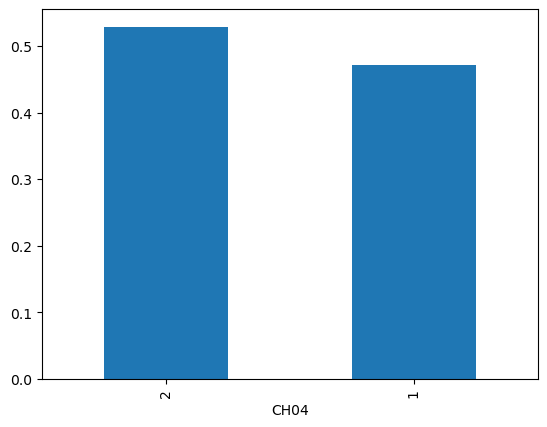

In [35]:
# #COMPOSICIÓN POR SEXO PARA 2004 Y 2024
# #CH04: Sexo. 1=Varón, 2=Mujer
# #ANO4: Año (2004, 2024)

df_2004_GB['CH04'].value_counts(1).plot.bar()

# ax = df_2004_GB[['CH04']].plot(kind='bar', title ="Composición por sexo para 2004 y 2024", figsize=(15, 10), legend=True, fontsize=12)
# ax.set_xlabel("Año", fontsize=12)
# ax.set_ylabel("Cantidad", fontsize=12)
# plt.show() 

In [ ]:
# #MATRIZ DE CORRELACIÓN
# df = pd.DataFrame(
#     {
#         "Day 1": [7, 1, 5, 6, 3, 10, 5, 8],
#         "Day 2": [1, 2, 8, 4, 3, 9, 5, 2],
#         "Day 3": [4, 6, 5, 8, 6, 1, 2, 3],
#         "Day 4": [5, 8, 9, 5, 1, 7, 8, 9],
#     }
# )

# upp_mat = np.triu(df.corr())

# sns.heatmap(df.corr(), vmin=-1, vmax=+1, annot=True, cmap="coolwarm", mask=upp_mat)

In [49]:
#COUNT: DESOCUPADOS, INACTIVOS, OCUPADOS

print("Estado 2004:", df_2004_GB["ESTADO"].value_counts())
 
print("Estado 2024:", df_2024_GB["ESTADO"].value_counts()) #ACA HAY ALGO RARO PORQUE LOS VALORES TENDRIAN Q IR D 0 A 4. 

Estado 2004: ESTADO
1    3079
3    2800
4    1230
2     528
0      10
Name: count, dtype: int64
Estado 2024: ESTADO
3    2662
4     813
Name: count, dtype: int64


In [53]:
df_2024_GB['ESTADO'].head()


256    3
277    3
278    4
403    3
405    3
Name: ESTADO, dtype: int64

In [76]:
#INGRESO PER CÁPITA FAMILIAR SEGÚN ESTADO (OCUPADO, DESOCUPADO, INACTIVO)
#IPCF: Monto de ingreso per capita familiar percibido
#ESTADO: 0 = Entrevista individual no realizada (no respuesta al cuestionario individual)
    # 1 = Ocupado
    # 2 = Desocupado
    # 3 = Inactivo
    # 4 = Menor de 10 años

df_combined["IPCF"].groupby(df_combined["ESTADO"]).describe()


,count,mean,std,min,25%,50%,75%,max
ESTADO,,,,,,,,
0,10.0,52.500000,98.051290,0.0,0.0,0.0,38.25,294.0
1,3079.0,475.869763,1090.246916,0.0,151.0,300.0,550.00,54000.0
2,528.0,224.022727,233.977138,0.0,85.0,160.0,297.25,2000.0
3,2800.0,315.706786,337.230996,0.0,120.0,210.0,400.00,4500.0
4,1230.0,246.034959,340.707278,0.0,84.0,152.5,300.00,4800.0


In [121]:
#ARMAR BASE DE RESPONDIERON Y NO RESPONDIERON

respondieron= df_combined.loc[(df_GB["ESTADO"]>0)]

norespondieron = df_combined.loc[(df_GB["ESTADO"]==0)] #10 personas no respondieron. 

def det_pea(estado): 
    return 1 if estado in [1,2] else 0

respondieron["PEA"]= respondieron["ESTADO"].apply(det_pea)

def det_pet(edad): 
    return 1 if 15 <= edad <= 65 else 0

respondieron["PET"]= respondieron["CH06"].apply(det_pet)

def det_deso(estado): 
    return 1 if estado == 2 else 0

respondieron["desocupado"]= respondieron["ESTADO"].apply(det_deso)


C:\Users\magda\AppData\Local\Temp\ipykernel_36444\849121505.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  respondieron["PEA"]= respondieron["ESTADO"].apply(det_pea)
C:\Users\magda\AppData\Local\Temp\ipykernel_36444\849121505.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  respondieron["PET"]= respondieron["CH06"].apply(det_pet)
C:\Users\magda\AppData\Local\Temp\ipykernel_36444\849121505.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

In [123]:
respondieron["desocupado"].value_counts()

desocupado
0    7109
1     528
Name: count, dtype: int64

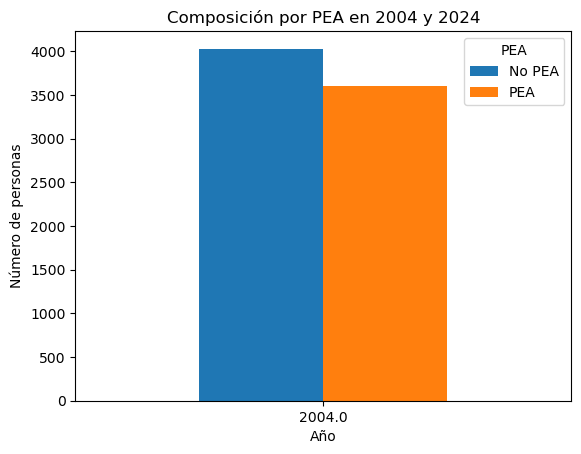

Total PET: 4893
Total PEA: 3607


In [115]:
# Agrupar datos por año y PEA
resultados = respondieron.groupby(['ANO4', 'PEA']).size().unstack(fill_value=0)

# Crear gráfico de barras
resultados.plot(kind='bar')
plt.title('Composición por PEA en 2004 y 2024')
plt.xlabel('Año')
plt.ylabel('Número de personas')
plt.xticks(rotation=0)
plt.legend(['No PEA', 'PEA'], title='PEA')
plt.show()

# Comparar PET y PEA
total_pet = respondieron['PET'].sum()
total_pea = respondieron['PEA'].sum()

print(f'Total PET: {total_pet}')
print(f'Total PEA: {total_pea}')